# PyVTK 

PyVTK is a Python library for creating files for use with ParaView or VTK toolkit.

VTK supports the following data types:

![alt text](https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/datatypes1.jpg "VTK data structures")

In [ ]:
!pip install pyvtk
!wget https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/perlin3d.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvtk: filename=PyVTK-0.5.18-py3-none-any.whl size=24735 sha256=5fcfe767140d91a3f72513425b133c0ea9d74c3321ad8d02150b89e7efb6b352
  Stored in directory: /root/.cache/pip/wheels/83/bb/df/9d8af5e23c0eb53cc886ded8ce7765973ddc7442423cf7890c
Successfully built pyvtk
--2022-09-12 12:15:57--  https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/perlin3d.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3447 (3.4K) [text/plain]
Saving to: ‘perlin3d.py’

perlin3d.py         100%[===================>]   3.37K  --.-KB/s    in 0s      

2022-09-12 12:15:57 (57.3 MB/s) - ‘perlin3d.py’ saved [3447/3447]



# Example 1

From https://github.com/pearu/pyvtk/tree/master/examples

Define the structure

In [ ]:
from pyvtk import *

structure = PolyData(points=[[0,0,0],[1,0,0],[1,1,0],[0,1,0],
                             [0,0,1],[1,0,1],[1,1,1],[0,1,1]],
                     polygons=[[0,1,2,3],[4,5,6,7],[0,1,5,4],
                               [2,3,7,6],[0,4,7,3],[1,2,6,5]])

Add data to points

In [ ]:
pointdata = PointData(\
    Scalars([0,1,2,3,4,5,6,7],
            name='sample_scalars'))

Add data to cells

In [ ]:
celldata = CellData(\
    Scalars([0,1,2,3,4,5],
            name='cell_scalars'),
    Normals([[0,0,1],[0,0,1],[0,-1,0],
             [0,1,0],[-1,0,0],[1,0,0]],
            name='cell_normals'),
    Field('FieldData',
          cellIds=[[0],[1],[2],[3],[4],[5]],
          faceAttributes=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]]))

Create VtkData object to write data to disk. This will create text based or binary vtk files.

In [ ]:
vtk = VtkData(structure,pointdata,celldata)
vtk.tofile('example1','ascii')
vtk.tofile('example1b','binary')

A vtk-file has the following structure:

In [ ]:
%pycat example1.vtk

# Example 2

In [ ]:
vtk = VtkData(StructuredPoints([3,4,6]),
              PointData(Scalars([0,0,0,0,0,0,0,0,0,0,0,0,
                                 0,5,10,15,20,25,25,20,15,10,5,0,
                                 0,10,20,30,40,50,50,40,30,20,10,0,
                                 0,10,20,30,40,50,50,40,30,20,10,0,
                                 0,5,10,15,20,25,25,20,15,10,5,0,
                                 0,0,0,0,0,0,0,0,0,0,0,0
                                 ])))

vtk.tofile('example2')

# Example 3

In [ ]:
vtk = VtkData('example2',only_structure = 1)

def f(x,y,z):
    return x*y*z
    
vtk.point_data.append(vtk.structure.Scalars(f,'x*y*z'))
vtk.tofile('example2f_sp')

# Example 4

In [ ]:
pp = [(i*2,j*2,k*2) for k in range(6) for j in range(4) for i in range(3)]

print(pp)

vtk = VtkData(StructuredGrid([3,4,6],pp))
vtk.point_data.append(vtk.structure.Scalars(f,'x*y*z'))
vtk.tofile('example2f_sg')

# Example 5

In [ ]:
vtk = VtkData(RectilinearGrid(range(6),range(8),range(12)))
vtk.point_data.append(vtk.structure.Scalars(f,'x*y*z'))
vtk.tofile('example2f_rg')

# Example 6

In [ ]:
voxels = []
points = []
n = 0
for k in range(6):
    for j in range(4):
        for i in range(3):
            points.append((i,j,k))
            if not (k==5 or j==3 or i==2):
                voxels.append([n,n+1,n+3,n+3+1,n+3*4,n+3*4+1,n+3*4+3,n+3*4+3+1])
            n += 1
vtk = VtkData(UnstructuredGrid(points, voxel=voxels))
vtk.point_data.append(vtk.structure.Scalars(f,'x*y*z'))
vtk.tofile('example2f_usg')

# Example 7

In [ ]:
points = [[0,0,0],[1,0,0],[2,0,0],[0,1,0],[1,1,0],[2,1,0],
          [0,0,1],[1,0,1],[2,0,1],[0,1,1],[1,1,1],[2,1,1],
          [0,1,2],[1,1,2],[2,1,2],[0,1,3],[1,1,3],[2,1,3],
          [0,1,4],[1,1,4],[2,1,4],[0,1,5],[1,1,5],[2,1,5],
          [0,1,6],[1,1,6],[2,1,6]
          ]
vectors = [[1,0,0],[1,1,0],[0,2,0],[1,0,0],[1,1,0],[0,2,0],
           [1,0,0],[1,1,0],[0,2,0],[1,0,0],[1,1,0],[0,2,0],
           [0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],
           [0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],
           [0,0,1],[0,0,1],[0,0,1]
           ]
vtk = VtkData(\
        UnstructuredGrid(points,
                         hexahedron=[[0,1,4,3,6,7,10,9],
                                     [1,2,5,4,7,8,11,10]],
                         tetra=[[6,10,9,12],
                                [5,11,10,14]],
                         polygon=[15,16,17,14,13,12],
                         triangle_strip=[18,15,19,16,20,17],
                         quad=[22,23,20,19],
                         triangle=[[21,22,18],
                                   [22,19,18]],
                         line=[26,25],
                         vertex=[24]
                         ),
        PointData(Vectors(vectors),Scalars(range(27))),
        'Unstructured Grid Example'
        )
vtk.tofile('example3')

# Example 8 - Loading and converting data

In [ ]:
!wget https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/uvw.dat
!head uvw.dat

--2022-09-12 12:30:09--  https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/uvw.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16996800 (16M) [text/plain]
Saving to: ‘uvw.dat’

uvw.dat             100%[===================>]  16.21M  --.-KB/s    in 0.06s   

2022-09-12 12:30:09 (250 MB/s) - ‘uvw.dat’ saved [16996800/16996800]

variables="x","y","z","u","v","w"
zone i=96,j=65,k=48,f=point
0 -1 0 -7.00895e-05 2.28715e-05 7.11905e-05
0.0327249 -1 0 -8.01278e-05 1.89072e-05 4.83821e-05
0.0654498 -1 0 -6.8715e-05 8.60358e-06 -1.31806e-06
0.0981748 -1 0 -3.79768e-05 -4.03025e-06 -5.09628e-05
0.1309 -1 0 -8.62436e-06 -1.93002e-05 -9.18307e-05
0.163625 -1 0 5.18301e-06 -2.96726e-05 -8.77444e-05
0.19635 -1 0 3.97951e-06 -2.64684

In [ ]:
import numpy as np
import pyvtk as vtk

print("Reading from uvw.dat...")
xyzuvw = np.loadtxt('uvw.dat', skiprows=2)

print("Converting to points and vectors")
points = xyzuvw[:, 0:3].tolist()
vectors = xyzuvw[:, 3:].tolist() 

#pointdata = vtk.PointData(vtk.Vectors(vectors, name="vec1"), vtk.Vectors(vectors, name="vec2"))
pointdata = vtk.PointData(vtk.Vectors(vectors, name="vec1"))
data = vtk.VtkData(vtk.StructuredGrid([96, 65, 48], points), pointdata)
data.tofile('uvw','ascii')

Reading from uvw.dat...
Converting to points and vectors


# Example 9 - Loading elevation data

In [ ]:
!wget https://github.com/jonaslindemann/compute-course-public/raw/master/dataviz/colorado_elev.vit

--2022-09-12 12:37:52--  https://github.com/jonaslindemann/compute-course-public/raw/master/dataviz/colorado_elev.vit
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/colorado_elev.vit [following]
--2022-09-12 12:37:53--  https://raw.githubusercontent.com/jonaslindemann/compute-course-public/master/dataviz/colorado_elev.vit
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160268 (157K) [application/octet-stream]
Saving to: ‘colorado_elev.vit’

colorado_elev.vit   100%[===================>] 156.51K  --.-KB/s    in 0.002s  

2022-09-12 12:37:53 (62

(160000,)


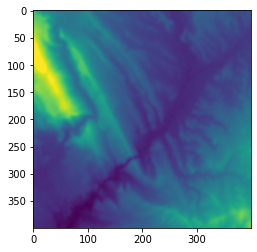

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyvtk as vtk
import os

f = open("colorado_elev.vit", "rb")  # reopen the file
f.seek(268, os.SEEK_SET)  # seek

x = np.fromfile(f, dtype=np.ubyte)  # read the data into numpy
print(x.shape)

elevation = np.reshape(x, (400,400))
plt.imshow(elevation)

plt.show()

pointdata = vtk.PointData(vtk.Scalars(x))
data = vtk.VtkData(vtk.StructuredPoints([400,400]), pointdata)
data.tofile('elevation','ascii')



# Example 10 - 3D Perlin data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import perlin3d as pn
import pyvtk as vtk

noise = pn.generate_perlin_noise_3d((128, 128, 128), (8, 8, 8))

pointdata = vtk.PointData(vtk.Scalars(noise.reshape((128*128*128,))))

# pointdata = vtk.PointData(vtk.Scalars(...), vtk.Vectors(...))

data = vtk.VtkData(vtk.StructuredPoints([128,128,128]), pointdata)
data.tofile('perlin3d', 'ascii')